In [123]:

import numpy as np         # dealing with arrays
import os                  # dealing with directories

import pandas as pd
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import glob
from sklearn.naive_bayes import GaussianNB  
from sklearn.metrics import classification_report, plot_confusion_matrix,accuracy_score

### functions

In [4]:
# time drop
def time_drop(df):
    x=df['Time'].values[0]+7
    indexNames = df[df['Time'] <= x].index
    df.drop(indexNames , inplace=True)
    return df  

In [5]:
#merge rowes
def merge_rowes(df):
    df.set_index(" Hand Type", inplace = True)
    df_lf_sync = df.loc[["left"]].reset_index()
    df_rg_sync = df.loc[["right"]].reset_index()
    df_sync= pd.merge(df_lf_sync , df_rg_sync, left_index=True, right_index=True, how='outer')
    return df_sync

In [6]:
# drop worng num of hands
def drop_hands(df,x):
    indexNames = df[df[' # hands'] == x].index
    df.drop(indexNames , inplace=True)
    return df

### sync data


In [7]:

path = r'D:\downloads\קבצים לעבודת גמר\extraFiles\Training\all data\sync' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None,)
    time_drop(df)
    drop_hands(df,1)
    li.append(df)
    frame_sy = pd.concat(li, axis=0, ignore_index=True)    
      
    
      


In [8]:
frame_sy.groupby(' Hand Type').count()

Time   Frame ID   # hands   Position X   Position Y   Position Z  \
 Hand Type                                                                      
left        34044      34044     34044        34044        34044        34044   
right       34044      34044     34044        34044        34044        34044   

             Velocity X   Velocity Y   Velocity Z   Pitch  ...    Yaw  \
 Hand Type                                                 ...          
left              34044        34044        34044   34044  ...  34044   
right             34044        34044        34044   34044  ...  34044   

             Wrist Pos X   Wrist Pos Y   Wrist Pos Z   Elbow pos X  \
 Hand Type                                                           
left               34044         34044         34044         34044   
right              34044         34044         34044         34044   

             Elbow Pos Y   Elbow Pos Z   Grab Strenth   Grab Angle  \
 Hand Type                                                           
left               34044         34044          34044        34044   
right              34044         34044          34044        34044   

             Pinch Strength  
 Hand Type                   
left                  34044  
right                 34044  

[2 rows x 21 columns]

In [9]:
frame_sy=merge_rowes(frame_sy)

### Spontan data

In [10]:

path = r'D:\downloads\קבצים לעבודת גמר\extraFiles\Training\all data\Spontan' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    time_drop(df)
    drop_hands(df,1)
    li.append(df)
    frame_sp = pd.concat(li, axis=0, ignore_index=True)    
      

In [11]:
frame_sp.groupby(' Hand Type').count()

Time   Frame ID   # hands   Position X   Position Y   Position Z  \
 Hand Type                                                                      
left        34182      34182     34182        34182        34182        34182   
right       34182      34182     34182        34182        34182        34182   

             Velocity X   Velocity Y   Velocity Z   Pitch  ...    Yaw  \
 Hand Type                                                 ...          
left              34182        34182        34182   34182  ...  34182   
right             34182        34182        34182   34182  ...  34182   

             Wrist Pos X   Wrist Pos Y   Wrist Pos Z   Elbow pos X  \
 Hand Type                                                           
left               34182         34182         34182         34182   
right              34182         34182         34182         34182   

             Elbow Pos Y   Elbow Pos Z   Grab Strenth   Grab Angle  \
 Hand Type                                                           
left               34182         34182          34182        34182   
right              34182         34182          34182        34182   

             Pinch Strength  
 Hand Type                   
left                  34182  
right                 34182  

[2 rows x 21 columns]

In [12]:
frame_sp =merge_rowes(frame_sp)

### Alone data

In [13]:
path = r'D:\downloads\קבצים לעבודת גמר\extraFiles\Training\all data\Alone' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    time_drop(df)
    drop_hands(df,2)
    li.append(df)
    frame_alone = pd.concat(li, axis=0, ignore_index=True)    
      

In [14]:
indexNames = frame_alone[frame_alone[' Hand Type'] == 'right'].index
# Delete these row indexes from dataFrame
frame_alone.drop(indexNames , inplace=True)

In [15]:
frame_alone=frame_alone.reset_index()


In [16]:
path = r'D:\downloads\קבצים לעבודת גמר\extraFiles\Training\all data\right' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    time_drop(df)
    drop_hands(df,2)
    li.append(df)
    df_right = pd.concat(li, axis=0, ignore_index=True)    
      

In [17]:
indexNames =df_right[df_right[' Hand Type'] == 'left'].index
# Delete these row indexes from dataFrame
df_right.drop(indexNames , inplace=True)

In [18]:
df_right=df_right.dropna()

In [19]:
df_right_copy=df_right

In [20]:
li = []
for i in range (9):
    df = df_right_copy
    li.append(df)
    df_right_copymul = pd.concat(li, axis=0, ignore_index=True)
    

In [21]:
 df_right_copymul

Time   Frame ID  Hand Type   # hands   Position X   Position Y  \
0      135.3024      16287      right         1    11.930320     199.9861   
1      135.3194      16289      right         1    11.191900     195.3075   
2      135.3357      16291      right         1    10.533080     189.0297   
3      135.3524      16293      right         1    10.243000     181.9816   
4      135.3690      16295      right         1    10.020610     174.8592   
...         ...        ...        ...       ...          ...          ...   
35032  201.0806      23867      right         1    -8.623579     163.7605   
35033  201.0967      23869      right         1   -13.097740     162.5545   
35034  201.1133      23871      right         1   -16.722380     160.9650   
35035  201.1299      23873      right         1   -19.684070     160.7849   
35036  201.1466      23875      right         1   -22.061090     161.7254   

        Position Z   Velocity X   Velocity Y   Velocity Z  ...       Yaw  \
0         4.981665   -35.512210   -165.34660    -57.68153  ... -0.906612   
1         3.661716   -43.587440   -309.83740    -77.18515  ... -0.904311   
2         2.829388   -30.403600   -363.00330    -43.79815  ... -0.901862   
3         2.064330   -15.424000   -423.21200    -43.99948  ... -0.901268   
4         1.228467    -8.733602   -413.45130    -53.88054  ... -0.897777   
...            ...          ...          ...          ...  ...       ...   
35032   207.301100  -271.901400    -12.95597   1133.33900  ...  0.004875   
35033   225.698500  -266.212900   -102.12860   1029.19300  ...  0.003377   
35034   240.584400  -192.594300    -87.53856    769.65150  ...  0.004909   
35035   251.099800  -158.997200     73.45740    557.20370  ...  0.004470   
35036   260.237800  -130.151100     32.14947    516.02330  ...  0.002082   

        Wrist Pos X   Wrist Pos Y   Wrist Pos Z   Elbow pos X   Elbow Pos Y  \
0         75.457400      206.0521      45.38764      284.3946     140.01670   
1         74.461410      202.4562      44.28679      282.6278     140.97120   
2         73.600600      197.4387      43.54082      280.6384     142.54010   
3         73.195370      191.7202      42.73155      279.7357     148.13820   
4         72.686710      186.1613      41.98006      278.6890     152.52150   
...             ...           ...           ...           ...           ...   
35032      5.541947      119.3280     267.78980      171.7839     -42.17188   
35033      1.698353      117.0805     285.09920      179.2368     -44.11964   
35034     -1.484266      114.0260     298.58760      186.0559     -44.35751   
35035     -4.015731      112.9914     308.15980      190.9921     -42.38844   
35036     -5.931119      113.1688     316.40630      195.0999     -39.38657   

        Elbow Pos Z   Grab Strenth   Grab Angle   Pinch Strength  
0          201.9318            0.0     0.561324              0.0  
1          203.6773            0.0     0.626321              0.0  
2          206.7526            0.0     0.636596              0.0  
3          209.9330            0.0     0.701644              0.0  
4          212.1112            0.0     0.786548              0.0  
...             ...            ...          ...              ...  
35032      410.2199            0.0     0.765803              0.0  
35033      413.5244            0.0     0.783391              0.0  
35034      415.7693            0.0     0.684677              0.0  
35035      416.7549            0.0     0.591905              0.0  
35036      417.6244            0.0     0.407940              0.0  

[35037 rows x 22 columns]

In [22]:
df_right_copymul.drop( df_right_copymul.tail(1096).index,
        inplace = True)

In [23]:
df_right_copymul=df_right_copymul.reset_index()

In [24]:
df_right_copymul.Time = frame_alone.Time


In [25]:
df_right_copymul[" Frame ID"]=frame_alone[" Frame ID"]

In [26]:
df_right_copymul.set_index(" Hand Type", inplace = True)
frame_alone.set_index(" Hand Type", inplace = True) 
df_lf_sync = frame_alone.loc[["left"]].reset_index()
df_rg_sync = df_right_copymul.loc[["right"]].reset_index()
df_sync= pd.merge(df_lf_sync , df_rg_sync, left_index=True, right_index=True, how='outer')

In [27]:
df_sync.columns


Index([' Hand Type_x', 'index_x', 'Time_x', ' Frame ID_x', ' # hands_x',
       ' Position X_x', ' Position Y_x', ' Position Z_x', ' Velocity X_x',
       ' Velocity Y_x', ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x',
       ' Wrist Pos X_x', ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x',
       ' Elbow Pos Y_x', ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
       ' Pinch Strength_x', ' Hand Type_y', 'index_y', 'Time_y', ' Frame ID_y',
       ' # hands_y', ' Position X_y', ' Position Y_y', ' Position Z_y',
       ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
       ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
       ' Wrist Pos Z_y', ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
       ' Grab Strenth_y', ' Grab Angle_y', ' Pinch Strength_y'],
      dtype='object')

In [28]:
df_sync=df_sync.drop(['index_x','index_y'], axis = 1)

In [29]:
frame_sy["Type"] = 0
frame_sp["Type"]=1
df_sync["Type"]=2

In [30]:
pdList = [frame_sy,frame_sp,df_sync]  # List of dataframes
df_all = pd.concat(pdList)

In [31]:
df_all =df_all.sort_values('Time_x')

In [32]:
df_all_copy =df_all 

In [33]:
df_all=df_all.drop([' Hand Type_x',' Hand Type_y',' Frame ID_x',' Frame ID_y','Time_x','Time_y',' # hands_y',' # hands_x'], axis = 1)

In [34]:
df_all = df_all[df_all.index % 5 == 0] 

In [35]:
df_all=df_all.reset_index()

In [36]:
df_all.drop(['index'], axis = 1)

Position X_x   Position Y_x   Position Z_x   Velocity X_x  \
0         -161.93030       215.8074       99.36817      12.804610   
1         -161.22340       212.4058       87.50900       3.532985   
2         -161.82330       213.6154       78.65861     -32.376840   
3         -160.93500       210.1329       71.86235      22.610750   
4         -160.58250       207.0979       63.93559     -51.164830   
...              ...            ...            ...            ...   
20430      -65.31718       144.7325      -24.19134      24.158350   
20431      -67.31480       141.4773      -28.84114     -14.888220   
20432      -70.24233       145.3648      -30.69582     -52.514450   
20433      -76.47509       163.2591      -20.86482     -16.747270   
20434      -78.43058       176.0170      -12.15266     -33.690260   

        Velocity Y_x   Velocity Z_x   Pitch_x    Roll_x     Yaw_x  \
0         -43.177220     -168.68700  1.445794  0.597092  1.481299   
1         -47.196920     -150.18110  1.375910  0.623088  1.417640   
2          22.527170      -73.77131  1.348653  0.683064  1.372902   
3         -70.876630      -71.02288  1.260213  0.620132  1.326412   
4           9.394481      -69.87844  1.138120  0.667229  1.203369   
...              ...            ...       ...       ...       ...   
20430     -53.874210      -68.65070  0.139560  2.219423  0.538324   
20431       7.543926      -16.64003  0.052639  2.266229  0.527760   
20432      82.300920       14.28084  0.079989  2.259698  0.515873   
20433     110.124500       37.32913  0.389075  2.046372  0.458347   
20434      98.243610       59.77054  0.667618  1.870251  0.434664   

        Wrist Pos X_x  ...   Wrist Pos X_y   Wrist Pos Y_y   Wrist Pos Z_y  \
0           -219.6073  ...        209.5091        172.5597       -2.273207   
1           -218.3664  ...        211.3094        171.0343       -2.788800   
2           -216.7381  ...        213.7225        173.8027      -11.694250   
3           -218.0253  ...        233.5582        179.9765      -17.977400   
4           -215.6021  ...        240.3272        181.6037      -32.688930   
...               ...  ...             ...             ...             ...   
20430       -105.9261  ...        131.3005        150.0649       57.949320   
20431       -107.4231  ...        131.0979        150.8263       57.907880   
20432       -109.8607  ...        131.7389        151.7366       59.905610   
20433       -111.7779  ...        130.7932        152.3160       61.863240   
20434       -108.0805  ...        129.2868        148.1146       63.112180   

        Elbow pos X_y   Elbow Pos Y_y   Elbow Pos Z_y   Grab Strenth_y  \
0            342.2353        15.95552       134.07660              0.0   
1            350.4548        22.07781       135.72930              0.0   
2            345.0773        30.38161       139.56850              0.0   
3            373.8328        27.76934       115.66440              0.0   
4            412.2614        54.60752        89.78521              0.0   
...               ...             ...             ...              ...   
20430        343.6214        46.46321       163.74800              0.0   
20431        341.6186        52.03195       171.60720              0.0   
20432        345.5939        50.43782       164.84090              0.0   
20433        330.2462        25.77906       167.75800              0.0   
20434        285.6505       -53.66640       106.02620              0.0   

        Grab Angle_y   Pinch Strength_y  Type  
0           1.476075                1.0     1  
1           1.434157                1.0     1  
2           1.099183                1.0     1  
3           0.272180                0.0     1  
4           0.411059                0.0     1  
...              ...                ...   ...  
20430       0.000000                0.0     0  
20431       0.000000                0.0     0  
20432       0.000000                0.0     0  
20433       0.000000                0.0     

### Test Data

### sync test data

In [37]:

path = r'D:\downloads\קבצים לעבודת גמר\extraFiles\Validation\test data\sync' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None,)
    time_drop(df)
    drop_hands(df,1)
    li.append(df)
    test_sy = pd.concat(li, axis=0, ignore_index=True)    
      
    

In [38]:
test_sy.groupby(' Hand Type').count()

Time   Frame ID   # hands   Position X   Position Y   Position Z  \
 Hand Type                                                                     
left        9959       9959      9959         9959         9959         9959   
right       9959       9959      9959         9959         9959         9959   

             Velocity X   Velocity Y   Velocity Z   Pitch  ...   Yaw  \
 Hand Type                                                 ...         
left               9959         9959         9959    9959  ...  9959   
right              9959         9959         9959    9959  ...  9959   

             Wrist Pos X   Wrist Pos Y   Wrist Pos Z   Elbow pos X  \
 Hand Type                                                           
left                9959          9959          9959          9959   
right               9959          9959          9959          9959   

             Elbow Pos Y   Elbow Pos Z   Grab Strenth   Grab Angle  \
 Hand Type                                                           
left                9959          9959           9959         9959   
right               9959          9959           9959         9959   

             Pinch Strength  
 Hand Type                   
left                   9959  
right                  9959  

[2 rows x 21 columns]

In [39]:
test_sy=merge_rowes(test_sy)

### spon test data

In [40]:

path = r'D:\downloads\קבצים לעבודת גמר\extraFiles\Validation\test data\spon' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None,)
    time_drop(df)
    drop_hands(df,1)
    li.append(df)
    test_spon = pd.concat(li, axis=0, ignore_index=True)    
      

In [41]:
 test_spon=merge_rowes(test_spon)

### alon test data

In [42]:
path = r'D:\downloads\קבצים לעבודת גמר\extraFiles\Validation\test data\alone' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None,)
    time_drop(df)
    drop_hands(df,2)
    li.append(df)
    test_alone = pd.concat(li, axis=0, ignore_index=True)   

In [43]:
indexNames = test_alone[test_alone[' Hand Type'] == 'right'].index
# Delete these row indexes from dataFrame
test_alone.drop(indexNames , inplace=True)

In [44]:
li = []
for i in range (3):
    df = df_right_copy
    li.append(df)
    df_right_test = pd.concat(li, axis=0, ignore_index=True)

In [45]:
df_right_test
df_right_test.drop(df_right_test.tail(1714).index,
        inplace = True)

In [46]:
df_right_test.Time = test_alone.Time

In [47]:
df_right_test[" Frame ID"]=test_alone[" Frame ID"]

In [48]:
df_right_test.set_index(" Hand Type", inplace = True)
test_alone.set_index(" Hand Type", inplace = True) 
df_lf_sync = test_alone.loc[["left"]].reset_index()
df_rg_sync = df_right_test.loc[["right"]].reset_index()
df_test_alone= pd.merge(df_lf_sync , df_rg_sync, left_index=True, right_index=True, how='outer')

In [49]:
df_test_alone

Hand Type_x    Time_x   Frame ID_x   # hands_x   Position X_x  \
0            left  962.0724       112175           1     -139.56040   
1            left  962.0892       112177           1     -137.84700   
2            left  962.1058       112179           1     -135.24040   
3            left  962.1220       112181           1     -131.68600   
4            left  962.1385       112183           1     -128.48180   
...           ...       ...          ...         ...            ...   
9960         left  796.7517        50329           1      -62.14733   
9961         left  796.7842        50331           1      -64.38816   
9962         left  796.8187        50333           1      -65.33954   
9963         left  796.8510        50336           1      -67.02361   
9964         left  796.8842        50338           1      -67.49754   

       Position Y_x   Position Z_x   Velocity X_x   Velocity Y_x  \
0          289.5980       55.82040       85.41927     -314.15190   
1          284.6244       55.60830       98.89174     -268.35150   
2          278.1614       55.07768      178.59840     -410.27810   
3          270.3371       54.44700      211.49920     -477.68290   
4          263.2296       53.83574      181.64070     -393.89460   
...             ...            ...            ...            ...   
9960       282.7198       62.15659      -90.00631     -129.34680   
9961       276.7341       60.39418      -51.70352     -204.26430   
9962       272.7191       59.17199      -27.79678     -111.88810   
9963       268.6757       57.91473      -31.61606      -76.33112   
9964       266.6283       57.18670      -14.96531      -64.54613   

       Velocity Z_x  ...     Yaw_y   Wrist Pos X_y   Wrist Pos Y_y  \
0        -17.789130  ... -0.906612        75.45740        206.0521   
1         -9.115684  ... -0.904311        74.46141        202.4562   
2        -36.843320  ... -0.901862        73.60060        197.4387   
3        -41.604380  ... -0.901268        73.19537        191.7202   
4        -33.762600  ... -0.897777        72.68671        186.1613   
...             ...  ...       ...             ...             ...   
9960     -50.105870  ... -0.236762        19.92887        185.1379   
9961     -56.992680  ... -0.234826        20.08685        191.1783   
9962     -42.745720  ... -0.242104        20.33551        195.9444   
9963     -24.734110  ... -0.244019        20.66610        200.1220   
9964     -20.448220  ... -0.241013        21.12155        202.6647   

       Wrist Pos Z_y   Elbow pos X_y   Elbow Pos Y_y   Elbow Pos Z_y  \
0           45.38764        284.3946       140.01670        201.9318   
1           44.28679        282.6278       140.97120        203.6773   
2           43.54082        280.6384       142.54010        206.7526   
3           42.73155        279.7357       148.13820        209.9330   
4           41.98006        278.6890       152.52150        212.1112   
...              ...             ...             ...             ...   
9960       180.89270        194.5628        14.65307        302.0390   
9961       175.55550        191.7803        18.45611        297.7268   
9962       168.77950        188.0646        22.63524        295.5403   
9963       161.68370        184.7965        27.69197        294.2224   
9964       153.32830        181.0418        32.00432        293.1064   

       Grab Strenth_y   Grab Angle_y   Pinch Strength_y  
0                 0.0       0.561324                0.0  
1                 0.0       0.626321                0.0  
2                 0.0       0.636596                0.0  
3                 0.0       0.701644                0.0  
4                 0.0       0.786548                0.0  
...               ...            ...                ...  
9960              0.0       0.104478                0.0  
9961              0.0       0.224780                0.0  
9962              0.0       0.366025                0.0  
9963              0.0       0.306320              

### test dataframe

In [50]:
test_sy["Type"] = 0
test_spon["Type"]=1
df_test_alone["Type"]=2

In [51]:
pdtest= [test_sy,test_spon,df_test_alone]  # List of dataframes
df_all_test = pd.concat(pdtest)

In [52]:
df_all_test

Hand Type_x    Time_x   Frame ID_x   # hands_x   Position X_x  \
0            left  873.0052       101916           2     -165.54570   
1            left  873.0218       101918           2     -166.27120   
2            left  873.0384       101919           2     -166.79580   
3            left  873.0549       101921           2     -167.63780   
4            left  873.0719       101923           2     -168.72350   
...           ...       ...          ...         ...            ...   
9960         left  796.7517        50329           1      -62.14733   
9961         left  796.7842        50331           1      -64.38816   
9962         left  796.8187        50333           1      -65.33954   
9963         left  796.8510        50336           1      -67.02361   
9964         left  796.8842        50338           1      -67.49754   

       Position Y_x   Position Z_x   Velocity X_x   Velocity Y_x  \
0          210.9649       34.54411      -20.78199      141.12930   
1          213.6761       37.09645      -41.68034      146.74810   
2          215.2421       38.41218      -60.55362      180.76270   
3          218.0545       41.03289      -51.15825      156.58920   
4          220.8092       43.93439      -51.35906      161.03810   
...             ...            ...            ...            ...   
9960       282.7198       62.15659      -90.00631     -129.34680   
9961       276.7341       60.39418      -51.70352     -204.26430   
9962       272.7191       59.17199      -27.79678     -111.88810   
9963       268.6757       57.91473      -31.61606      -76.33112   
9964       266.6283       57.18670      -14.96531      -64.54613   

       Velocity Z_x  ...   Wrist Pos X_y   Wrist Pos Y_y   Wrist Pos Z_y  \
0         158.17200  ...       126.75030        179.9287        47.80795   
1         152.49840  ...       124.27610        183.5448        48.00742   
2         151.87930  ...       123.14640        184.8697        48.46577   
3         151.88380  ...       121.73640        189.1438        49.87795   
4         164.96180  ...       121.28550        195.3674        51.79774   
...             ...  ...             ...             ...             ...   
9960      -50.10587  ...        19.92887        185.1379       180.89270   
9961      -56.99268  ...        20.08685        191.1783       175.55550   
9962      -42.74572  ...        20.33551        195.9444       168.77950   
9963      -24.73411  ...        20.66610        200.1220       161.68370   
9964      -20.44822  ...        21.12155        202.6647       153.32830   

       Elbow pos X_y   Elbow Pos Y_y   Elbow Pos Z_y   Grab Strenth_y  \
0           222.4352        19.06148        198.3806              0.0   
1           222.1145        14.49698        187.8518              0.0   
2           223.1355        13.36058        183.7166              0.0   
3           220.8872        11.79292        178.0254              0.0   
4           219.3576        13.83601        174.8188              0.0   
...              ...             ...             ...              ...   
9960        194.5628        14.65307        302.0390              0.0   
9961        191.7803        18.45611        297.7268              0.0   
9962        188.0646        22.63524        295.5403              0.0   
9963        184.7965        27.69197        294.2224              0.0   
9964        181.0418        32.00432        293.1064              0.0   

       Grab Angle_y   Pinch Strength_y  Type  
0          0.000000                0.0     0  
1          0.000000                0.0     0  
2          0.000000                0.0     0  
3          0.000000                0.0     0  
4          0.000000                0.0     0  
...             ...                ...   ...  
9960       0.104478                0.0     2  
9961       0.224780                0.0     2  
9962       0.366025                0.0     2  
9963       0.306320                0.0     2  
9964       0.183862          

In [53]:
#drop coulmms that can cuse overfit
df_all_test=df_all_test.drop([' Hand Type_x',' Hand Type_y',' Frame ID_x',' Frame ID_y','Time_x','Time_y',' # hands_y',' # hands_x'], axis = 1)

In [54]:
df_all_test =df_all_test[df_all_test.index % 5 == 0] 

In [55]:
df_all_test.shape

(6022, 37)

In [56]:
X_testdata = df_all_test.drop(labels = ["Type"], axis = 1) 
y_testdata = df_all_test["Type"]

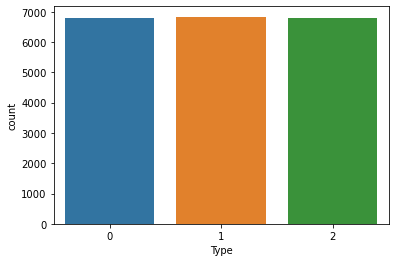

In [57]:
sns.countplot(x='Type', data=df_all)


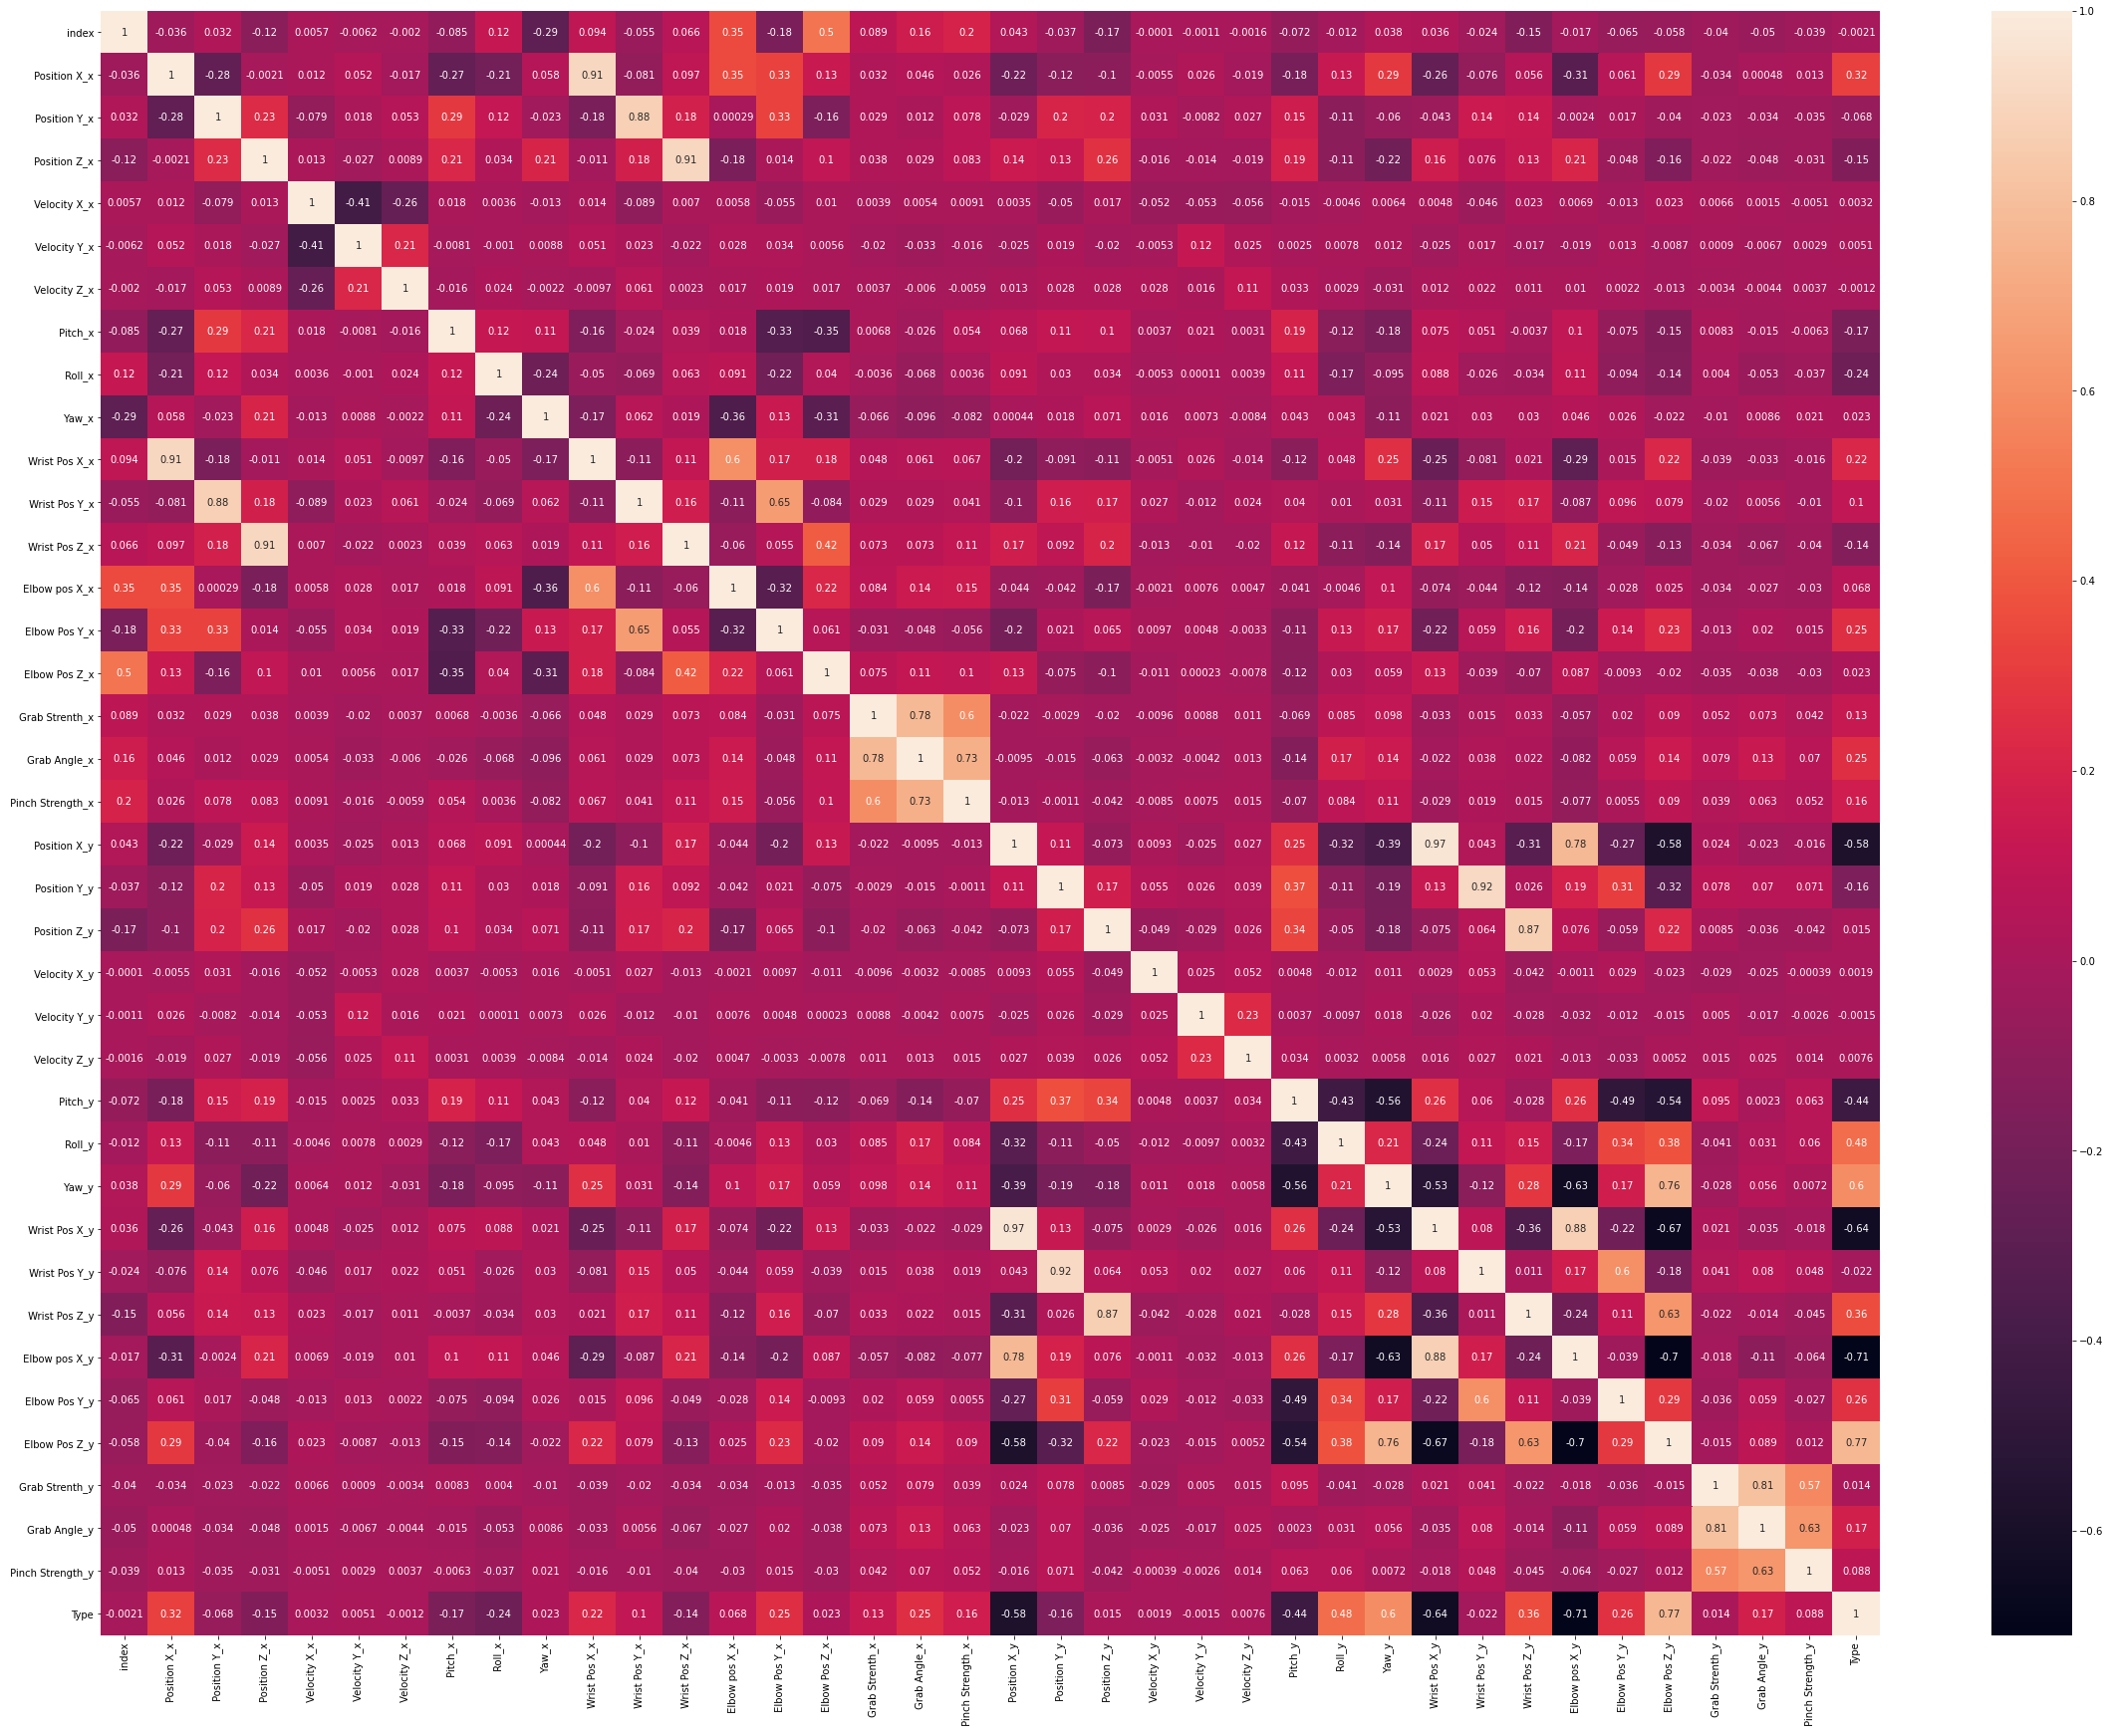

In [58]:
cormap = df_all.corr()
fig, ax = plt.subplots(figsize=(40,30))
sns.heatmap(cormap, annot = True)

In [59]:
import plotly.express as px
df = df_all

fig = px.scatter_3d(df, x=' Position X_x', y=' Position Y_x', z=' Position Z_x',
              color='Type',symbol='Type', title='Left hand positions')

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.show()

In [63]:
df = df_all
fig = px.scatter_3d(df, x=' Position X_y', y=' Position Y_y', z=' Position Z_y',
              color='Type',symbol='Type', title='Right hand positions',)
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.show()

You can clearly see here how the spontaneous and synchronized state are really mixed with each other compared to the state of alone which is really different from them<br/> 
It may make it difficult for us to classify them later because they are so similar

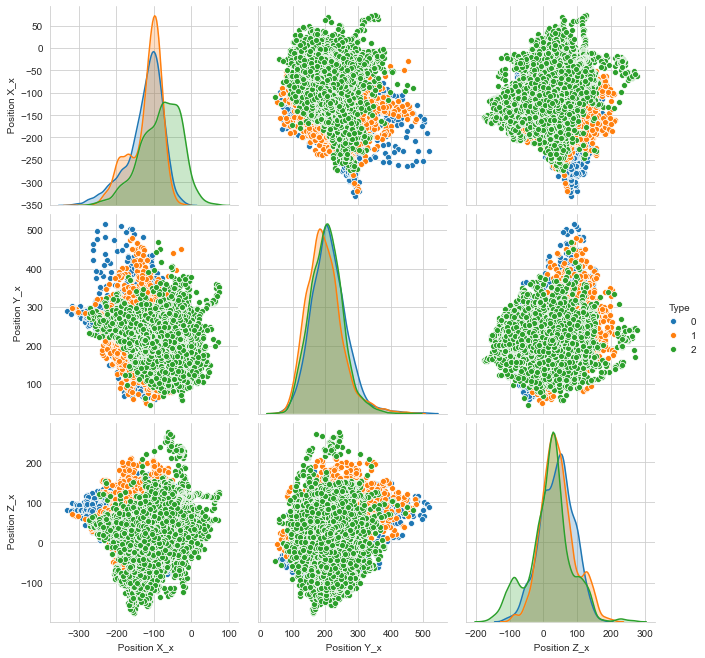

In [130]:
sns.set_style("whitegrid");
sns.pairplot(df,vars = [' Position X_x',' Position Y_x',' Position Z_x'], hue="Type", height=3)
plt.show()

In [65]:
y = df_all["Type"]
X = df_all.drop(labels = ["Type"], axis = 1)

In [66]:
X = X.drop(labels = ["index"], axis = 1)

In [67]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state=42)

### knn

In [68]:
#without pca
knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)
knn.score(X_test,  y_test)

0.9317347687790556

In [69]:
#with pca
pipe_knn1 = make_pipeline(StandardScaler(), PCA(n_components=16),knn)
pipe_knn1.fit(X_train,y_train)
y_pred=pipe_knn1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9730853927085882


### Tuning knn

In [2617]:
k_range = list(range(1, 101,2))
weight_options = ['uniform', 'distance']
metric_options = ['euclidean','minkowski']
param_grid = dict(n_neighbors=k_range, weights=weight_options,metric = metric_options)

In [2618]:
grid_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True,n_jobs=-1, verbose=3)
pipe_knn = make_pipeline(StandardScaler(), PCA(n_components=16),grid_knn)
pipe_knn.fit(X_train,y_train)
y_pred=pipe_knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 47.7min finished


Accuracy: 0.9897235135796427


In [2619]:
grid_knn.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

### xgb

In [91]:
# without pca
xgb1 = XGBClassifier(n_jobs = -1,learning_rate = 0.1, seed = 0,eval_metric='mlogloss',subsample=0.8, n_estimators=150, min_child_weight=10, max_depth=4, gamma=0.5, colsample_bytree=1.0)
xgb1.fit(X_train, y_train)
xgb1.score(X_test,  y_test)

C:\Users\Asaf Yekutiel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



0.9735747492047957

In [93]:
# with pca
pipe_xg = make_pipeline(StandardScaler(), PCA(n_components=16),xgb1)
pipe_xg.fit(X_train,y_train)
y_pred=pipe_xg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

C:\Users\Asaf Yekutiel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Accuracy: 0.9314900905309518


### Tuning XGB

In [2622]:
params_xgb = {
        'learning_rate':[ 0.1, 0.2, 0.3],
        'n_estimators':[100,150,200,250],
        'min_child_weight': [1,3, 5,7, 10],
        'gamma': [0,0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6,0.7, 0.8, 0.9, 1.0],
        'max_depth': [3, 4, 5,8]
        }

In [2623]:
xgb = XGBClassifier(objective='multi:softmax',
                    silent=True, nthread=1)
grid_xgb = RandomizedSearchCV(xgb, param_distributions=params_xgb,scoring='accuracy', return_train_score=True, n_jobs=-1, cv=5,verbose=3, 
                              n_iter=1000 )
pipe_xgb = make_pipeline(StandardScaler(), PCA(n_components=16),grid_xgb)
pipe_xgb.fit(X_train,y_train)
print('Model Accuracy: %.3f' % pipe_xgb.score(X_test, y_test))

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed: 46.5min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed: 61.1min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 77.7min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 97.1min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed: 119.0min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed: 141.5min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 154.0min finished
C:\Users\Asaf Yekutiel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use 

[00:25:40] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:25:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.974


In [2624]:
grid_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, silent=True, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Random Forest


In [129]:
# without pca
rfc = RandomForestClassifier(n_estimators=180,random_state=5, n_jobs=-1)
rfc.fit(X_train, y_train)
rfc.score(X_test,  y_test)

0.9872767310986054

In [130]:
# with pca
pipe_tr = make_pipeline(StandardScaler(), PCA(n_components=16),rfc)
pipe_tr.fit(X_train,y_train)
y_pred=pipe_tr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9608514803034011


### Tuning Random Forest

In [2627]:
tree_param_grid = [
    
    {
     'n_estimators': [100,150,200,250],
     'max_depth':[None,30,50,100],
     'max_features': ['auto','sqrt','log2'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2,3,5,7],
     'criterion' :['gini', 'entropy']  
        
    }
    
]

In [2628]:
rf = RandomForestClassifier()
gridTree = GridSearchCV(rf,tree_param_grid,scoring='accuracy', return_train_score=True, n_jobs=-1, cv=5, verbose=3)

In [2629]:
pipe = make_pipeline(StandardScaler(), PCA(n_components=16),gridTree)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 46.8min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 61.9min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed: 81.5min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed: 103.8min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed: 128.6min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 140.2min finished


Accuracy: 0.9615855150477123


In [2630]:
gridTree.best_estimator_

RandomForestClassifier(max_depth=30, max_features='log2', n_estimators=150)

 ### GaussianNB


In [143]:
gnb = GaussianNB() 
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=150)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=5, n_jobs=-1)
pipe_gnb = make_pipeline(StandardScaler(), PCA(n_components=16),nbModel_grid)
pipe_gnb.fit(X_train,y_train)
y_pred=pipe_gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    2.9s


Accuracy: 0.8497675556643014


[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    3.5s finished


### StackingClassifier

In [102]:
rnd_clf = RandomForestClassifier(max_depth=30, max_features='log2', n_estimators=150)
xgb_clf =XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=1,  monotone_constraints='()',
              n_estimators=200, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, silent=True, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)
adabost = AdaBoostClassifier(n_estimators=150, base_estimator=RandomForestClassifier(max_depth=30, max_features='log2', n_estimators=150),learning_rate=0.1,) 
knn = KNeighborsClassifier(100)
estimator_list = [
    ('knn',knn),
    ('xgb_tund',xgb_clf),
    ('rf_tund',rnd_clf ),
    ('adabost',adabost),
    ]

# Build stack model
stack_model = StackingClassifier(estimators=estimator_list, final_estimator=LogisticRegression(),cv =5,n_jobs=-1,verbose=3)
pipeline_SM = make_pipeline(StandardScaler(), PCA(n_components=16)
                       ,stack_model)
pipeline_SM.fit(X_train, y_train)
print('Model Accuracy: %.3f' % pipeline_SM.score(X_test, y_test))

Model Accuracy: 0.971


In [72]:
# bagging classifier
bagging = BaggingClassifier(base_estimator =xgb_clf,
                          n_estimators =30
                          ,random_state = 21,n_jobs=-1,verbose=3,bootstrap=True,bootstrap_features=True)
pipeline_Bagging = make_pipeline(StandardScaler(), PCA(n_components=16),
                       bagging)
pipeline_Bagging.fit(X_train, y_train)
print('Model Accuracy: %.3f' % pipeline_Bagging.score(X_test, y_test))

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:  1.6min remaining:  3.2min
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:  2.1min remaining:   41.3s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:  2.3min finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:    3.1s remaining:    6.2s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    5.0s remaining:    1.6s


Model Accuracy: 0.966


[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    6.0s finished


### Voting classfier 

In [75]:
rnd_clf = RandomForestClassifier(max_depth=30, max_features='log2', n_estimators=150)
xgb_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=1,  monotone_constraints='()',
              n_estimators=200, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, silent=True, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)
adabost = adabost 
knn = KNeighborsClassifier(100)
voting_clf = VotingClassifier(
    estimators=[('rf', rnd_clf), ('xgb', xgb_clf),('adabost', adabost),('knn',knn)],
    voting='hard')
pipeline_VH = make_pipeline(StandardScaler(), PCA(n_components=16)
                       ,voting_clf)
pipeline_VH.fit(X_train, y_train)
print('Model Accuracy: %.3f' % pipeline_VH.score(X_test, y_test))

C:\Users\Asaf Yekutiel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:54:43] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:54:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.964


In [81]:
rnd_clf = RandomForestClassifier(max_depth=30, max_features='log2', n_estimators=150)
xgb_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=1,  monotone_constraints='()',
              n_estimators=200, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, silent=True, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)
adabost = adabost 
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=1)
voting_Sclf = VotingClassifier(
    estimators=[('rf', rnd_clf), ('xgb', xgb_clf),('adabost', adabost),('knn',knn)],
    voting='soft')
pipeline_VS = make_pipeline(StandardScaler(), PCA(n_components=16)
                       ,voting_Sclf)
pipeline_VS.fit(X_train, y_train)
print('Model Accuracy: %.3f' % pipeline_VS.score(X_test, y_test))

C:\Users\Asaf Yekutiel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[15:04:01] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:04:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.986


### Scale And PCA pipeline

In [103]:
scaling_pipeline = Pipeline(
    [
        ('std_scaler', StandardScaler()),
        ('pca',PCA(n_components=16, random_state=0,svd_solver='auto')),       
    ]
)
scaled_train = scaling_pipeline.fit_transform(X)
scaled_test = scaling_pipeline.transform(X_testdata)

16


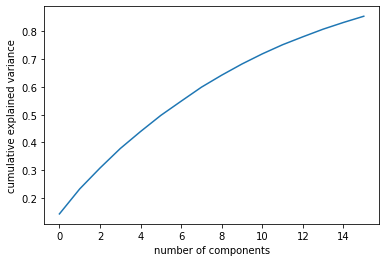

In [104]:
pca_data = scaling_pipeline['pca']
plt.plot(np.cumsum(pca_data.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
print(pca_data.n_components_)

## Chack the best models on the test part

In [117]:
#knn
knn_clf = KNeighborsClassifier(metric='euclidean', n_neighbors=1)
knn_clf.fit(scaled_train,y)# all train data
y_pred = knn_clf.predict(scaled_test)
test_acc = accuracy_score(y_testdata, y_pred) # final test
test_acc

0.8653271338425772

In [118]:
print (classification_report(y_testdata, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1992
           1       0.79      0.83      0.81      2037
           2       1.00      0.98      0.99      1993

    accuracy                           0.87      6022
   macro avg       0.87      0.87      0.87      6022
weighted avg       0.87      0.87      0.87      6022



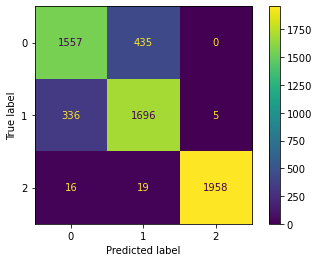

In [125]:
plot_confusion_matrix(knn_clf ,scaled_test,y_testdata)

Not too impressive I think the fact that the model only looks at one neighbor is related to that

In [120]:
#stack
stack_model.fit(scaled_train,y)
y_pred = stack_model.predict(scaled_test)
test_acc = accuracy_score(y_testdata, y_pred) 
test_acc

C:\Users\Asaf Yekutiel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.8865825307206908

In [121]:
print(classification_report(y_testdata, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1992
           1       0.78      0.93      0.85      2037
           2       1.00      0.99      0.99      1993

    accuracy                           0.89      6022
   macro avg       0.90      0.89      0.89      6022
weighted avg       0.90      0.89      0.89      6022



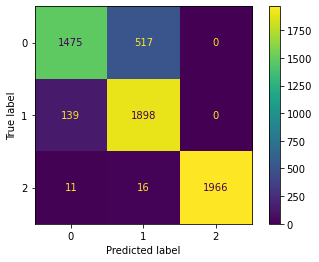

In [124]:
plot_confusion_matrix(stack_model,scaled_test,y_testdata)

In [126]:
voting_Sclf.fit(scaled_train,y)
y_pred = voting_Sclf.predict(scaled_test)
test_acc = accuracy_score(y_testdata, y_pred) # final test
test_acc

C:\Users\Asaf Yekutiel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[15:56:52] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:56:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8852540684158087

In [127]:
print (classification_report(y_testdata, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1992
           1       0.79      0.92      0.85      2037
           2       1.00      0.99      0.99      1993

    accuracy                           0.89      6022
   macro avg       0.89      0.88      0.88      6022
weighted avg       0.89      0.89      0.88      6022



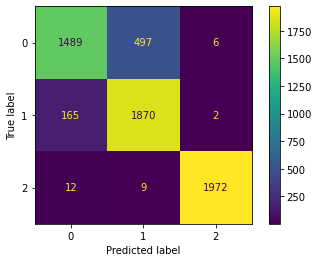

In [128]:
plot_confusion_matrix(voting_Sclf,scaled_test,y_testdata)

## Conclusions

As can be seen the model is very easy to identify the state of alone
But he has a relatively hard time recognizing the spontaneous state
In my opinion the reason could be that in the spontaneous state a person can make movements that are very reminiscent of the synchronized state and therefore the model tends to classify it as synchronized